In [ ]:
# 동네이름으로 연령별 인구 데이터 조회 ( 함수로 만들기 )

In [23]:
import csv

def pop_by_region(region):
    with open("data-files/population-202302.csv", "rt", encoding="utf-8") as f:
        pop_reader = csv.reader(f)

        titles = next(pop_reader) # next : 한 줄 읽고 다음 행으로 이동
        rows = []
        for row in pop_reader:
            if region in row[0]:
                rows.append(list(map(lambda v: int(v.replace(",", "")), row[3:104])))
    return rows

In [14]:
title_count_list = []
for row in rows:
    title_count = []
    for (title, cnt) in zip(titles[3:], row):
        title_count.append((title.split("_")[-1], cnt))
    title_count_list.append(title_count)

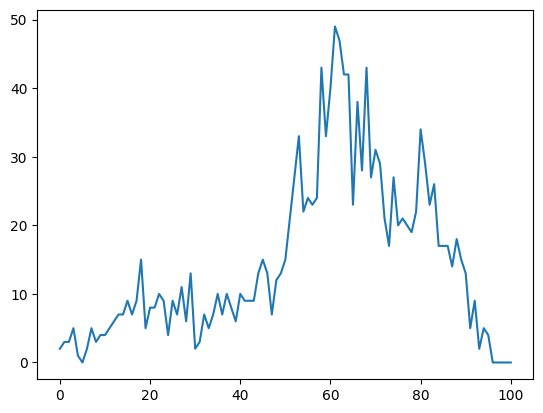

In [24]:
import matplotlib.pyplot as plt

plt.plot(rows[0])
plt.show()